# Problem 6 - Batch Normalization, Dropout, MNIST

Batch normalization and Dropout are used as effective regularization techniques. However its not clear which one should be preferred and whether their benefits add up when used in conjunction. In this problem we will compare batch normalization, dropout, and their conjunction using MNIST and LeNet-5 (see e.g., http://yann.lecun.com/exdb/lenet/). LeNet-5 is one of the earliest convolutional neural network developed for image classification and its implementation in all major framework is available. You can refer to Lecture 3 slides for definition of standardization and batch normalization.


1. Explain the terms co-adaptation and internal covariance-shift. Use examples if needed. You may need to refer to two papers mentioned below to answer this question. (Papers are in my ipad)

2. Batch normalization is traditionally used in hidden layers, for input layer standard normalization is used. In standard normalization the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch. Train LeNet-5 with standard normalization of input and batch normalization for hidden layers. What are the learned batch norm parameters for each layer ?

In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


norm_layer = Normalization()
norm_layer.adapt(X_train)

print(X_train.shape[1:])
model = Sequential()
# model.add(norm_layer)
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(84, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

(28, 28)


In [3]:
model.build()
model.summary()
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train,epochs= 10,batch_size=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 batch_normalization_5 (Batc  (None, 10, 10, 48)       192       
 hNormalization)                                                 
                                                      

In [8]:
outputs = [layer.output for layer in model.layers] 
outputs

print(model.layers[1].gamma, model.layers[1].beta,)
print(model.layers[4].gamma, model.layers[4].beta,)
print(model.layers[8].gamma, model.layers[8].beta,)
print(model.layers[10].gamma, model.layers[8].beta,)

# you need to plot the violin plots.

<tf.Variable 'batch_normalization_4/gamma:0' shape=(32,) dtype=float32, numpy=
array([0.73450094, 0.9141017 , 1.1243606 , 0.5339626 , 1.0276673 ,
       1.094946  , 1.1216943 , 0.6867287 , 1.042147  , 1.1035712 ,
       0.81167233, 1.2454077 , 1.1565273 , 1.0886773 , 1.1389145 ,
       1.1105791 , 0.7370587 , 0.9640114 , 0.99103576, 0.6292723 ,
       1.027613  , 0.55818063, 0.9629782 , 0.81738734, 0.97605586,
       1.0170078 , 1.082851  , 0.7180289 , 1.0984238 , 1.1171322 ,
       0.62764496, 0.6367039 ], dtype=float32)> <tf.Variable 'batch_normalization_4/beta:0' shape=(32,) dtype=float32, numpy=
array([ 0.17674018,  0.13955158,  0.08101559, -0.08352515,  0.10733306,
        0.15793419,  0.03258097,  0.1062014 ,  0.17719603,  0.12362269,
        0.1497542 , -0.20558745, -0.00795944,  0.22255063, -0.04652973,
        0.22432585,  0.02666678,  0.20083572,  0.16422936,  0.11957443,
       -0.02068507,  0.1925204 ,  0.19593234,  0.0638132 ,  0.09191626,
        0.22105731,  0.16966516, 


3. Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ? 

In [2]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



print(X_train.shape[1:])
model = Sequential()
# model.add(norm_layer)
model.add(tf.keras.layers.BatchNormalization(input_shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())

model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(84, activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

(28, 28)


In [3]:
model.build()
model.summary()
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model.fit(X_train, Y_train,epochs= 10,batch_size=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                      

KeyboardInterrupt: 

In [13]:
outputs = [layer.output for layer in model.layers] 
outputs

print(model.layers[0].gamma, model.layers[0].beta,)
print(model.layers[2].gamma, model.layers[2].beta,)
print(model.layers[5].gamma, model.layers[5].beta,)
print(model.layers[9].gamma, model.layers[9].beta,)
print(model.layers[11].gamma, model.layers[11].beta,)

<tf.Variable 'batch_normalization_13/gamma:0' shape=(1,) dtype=float32, numpy=array([0.98208195], dtype=float32)> <tf.Variable 'batch_normalization_13/beta:0' shape=(1,) dtype=float32, numpy=array([0.22662392], dtype=float32)>
<tf.Variable 'batch_normalization_14/gamma:0' shape=(32,) dtype=float32, numpy=
array([0.7684027 , 0.88733906, 1.0514632 , 1.097466  , 0.6171542 ,
       0.70947623, 0.61347353, 1.0506831 , 1.1648184 , 1.082974  ,
       0.99188066, 1.0628668 , 0.717255  , 1.2729177 , 0.9211315 ,
       0.7427105 , 1.212307  , 0.88963807, 1.0939035 , 0.86567515,
       1.1956588 , 0.92124933, 1.2822005 , 0.9025572 , 0.7598906 ,
       1.1256709 , 0.92162013, 0.73857   , 0.8399067 , 0.9527584 ,
       1.1395913 , 1.0719141 ], dtype=float32)> <tf.Variable 'batch_normalization_14/beta:0' shape=(32,) dtype=float32, numpy=
array([ 0.17463677,  0.22006167,  0.08709119,  0.16212058,  0.21278928,
        0.02032804,  0.13029206,  0.00379577,  0.07075272,  0.12857544,
        0.06798032, 


4. Train the network without batch normalization but this time use dropout. For hidden layers use dropout probability of 0.5 and for input layer take it to be 0.2 Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

no batch normal not normalization with dropout

In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()



print(X_train.shape[1:])
model = Sequential()
# model.add(norm_layer)
model.add(tf.keras.layers.Dropout(0.5,input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))


model.add(MaxPool2D(strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))

model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(84, activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))

(28, 28)


In [14]:
model.build()
model.summary()
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history = model.fit(X_train, Y_train,epochs= 5,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 28, 28, 1)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                  

313/313 - 2s - loss: 0.0805 - accuracy: 0.9813 - 2s/epoch - 5ms/step


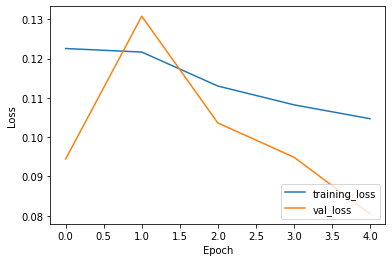

In [15]:
#getting the accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'], label='training_loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)


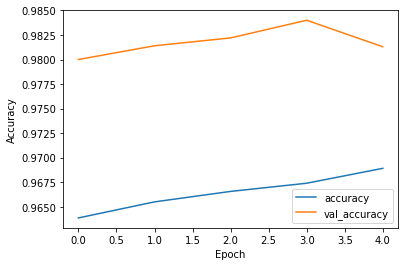

In [16]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


5. Now train the network using both batch normalization and dropout. How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? 

add batch any case
batch normalizaiotn and dropout. 